In [1]:
import newspaper
from newspaper import Article

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
url = "https://sleman-football.com/nostalgia-taktikal-tren-gol-pss-di-liga-2-2018/"
article=Article(url)
article.download()
article.parse()
txt=article.text
txt = txt.encode('ascii', 'ignore').decode("utf-8")
txt

'PS Sleman menyudahi perjalanan Liga 2 2018 dengan status juara. Selama perjalanannya, Super Elja berhasil mencetak 53 gol. Dari 31 pertandingan yang dijalani, PSS hanya gagal mencetak gol di tujuh pertandingan.\n\nDua kali laga away ke Kalteng Putera, dua kali bertandang ke Madura FC, dan masing-masing sekali saat away melawan PSIM, Blitar United, dan Martapura. Namun, Jika dirata-rata, Cristian Gonzales dan kawan-kawan mampu mencetak 1.7 gol per pertandingan. Catatan yang cukup apik.\n\nSecara umum, Seto Nurdiyantoro mencoba menerapkan permainan Possession Progressive dengan berusaha mengalirkan bola dari lini ke lini guna menciptakan peluang untuk mencetak gol.\n\nGambar 1. Gol-Gol PSS dalam situasi Assisted dan Unassisted\n\nHal itu membuat mayoritas gol yang dicetak oleh Super Elja berasal dari situasi assisted, atau situasi si pencetak gol mendapatkan bola dari umpan rekannya. Dari 53 gol yang dicetak, gol dari situasi assisted mencapai 65% (34 gol). Sisanya, 18 gol berhasil dice

In [3]:
#Preprocessing The Article
import re, string, unicodedata

def cleaning(str):
    #remove non-ascii
    str = unicodedata.normalize('NFKD', str).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #remove URLs
    str = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', str)
    #remove punctuations
    str = re.sub(r'[^\w]|_',' ',str)
    #remove digit from string
    str = re.sub("\S*\d\S*", "", str).strip()
    #remove digit or numbers
    str = re.sub(r"\b\d+\b", " ", str)
    #to lowercase
    str = str.lower()
    #Remove additional white spaces
    str = re.sub('[\s]+', ' ', str)
    
    return str

In [4]:
clean_txt = cleaning(txt)
clean_txt

'ps sleman menyudahi perjalanan liga dengan status juara selama perjalanannya super elja berhasil mencetak gol dari pertandingan yang dijalani pss hanya gagal mencetak gol di tujuh pertandingan dua kali laga away ke kalteng putera dua kali bertandang ke madura fc dan masing masing sekali saat away melawan psim blitar united dan martapura namun jika dirata rata cristian gonzales dan kawan kawan mampu mencetak gol per pertandingan catatan yang cukup apik secara umum seto nurdiyantoro mencoba menerapkan permainan possession progressive dengan berusaha mengalirkan bola dari lini ke lini guna menciptakan peluang untuk mencetak gol gambar gol gol pss dalam situasi assisted dan unassisted hal itu membuat mayoritas gol yang dicetak oleh super elja berasal dari situasi assisted atau situasi si pencetak gol mendapatkan bola dari umpan rekannya dari gol yang dicetak gol dari situasi assisted mencapai gol sisanya gol berhasil dicetak dari situasi unassisted gambar lokasi asis dari gol gol yang dic

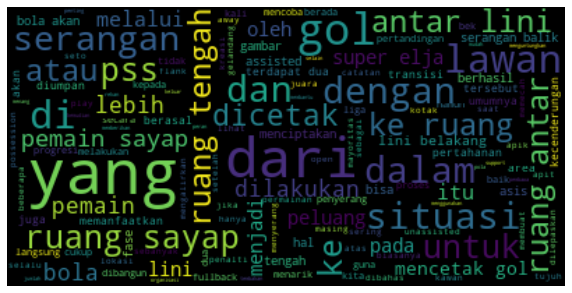

In [5]:
wordcloud = WordCloud(max_font_size=45).generate(clean_txt)
plt.figure(figsize=(10,8))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [6]:
#Word Frequency
words_in_article = clean_txt.split()
words_in_article

['ps',
 'sleman',
 'menyudahi',
 'perjalanan',
 'liga',
 'dengan',
 'status',
 'juara',
 'selama',
 'perjalanannya',
 'super',
 'elja',
 'berhasil',
 'mencetak',
 'gol',
 'dari',
 'pertandingan',
 'yang',
 'dijalani',
 'pss',
 'hanya',
 'gagal',
 'mencetak',
 'gol',
 'di',
 'tujuh',
 'pertandingan',
 'dua',
 'kali',
 'laga',
 'away',
 'ke',
 'kalteng',
 'putera',
 'dua',
 'kali',
 'bertandang',
 'ke',
 'madura',
 'fc',
 'dan',
 'masing',
 'masing',
 'sekali',
 'saat',
 'away',
 'melawan',
 'psim',
 'blitar',
 'united',
 'dan',
 'martapura',
 'namun',
 'jika',
 'dirata',
 'rata',
 'cristian',
 'gonzales',
 'dan',
 'kawan',
 'kawan',
 'mampu',
 'mencetak',
 'gol',
 'per',
 'pertandingan',
 'catatan',
 'yang',
 'cukup',
 'apik',
 'secara',
 'umum',
 'seto',
 'nurdiyantoro',
 'mencoba',
 'menerapkan',
 'permainan',
 'possession',
 'progressive',
 'dengan',
 'berusaha',
 'mengalirkan',
 'bola',
 'dari',
 'lini',
 'ke',
 'lini',
 'guna',
 'menciptakan',
 'peluang',
 'untuk',
 'mencetak',
 'g

In [7]:
import collections
import itertools

# Create counter
counts_no_urls = collections.Counter(words_in_article)

counts_no_urls.most_common(15)

[('yang', 44),
 ('ruang', 37),
 ('dari', 35),
 ('gol', 27),
 ('lini', 22),
 ('ke', 21),
 ('sayap', 20),
 ('serangan', 18),
 ('pemain', 17),
 ('di', 16),
 ('lawan', 16),
 ('tengah', 15),
 ('dengan', 14),
 ('dan', 14),
 ('dalam', 14)]

In [8]:
import pandas as pd

df = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

df.head()

,words,count
0,yang,44
1,ruang,37
2,dari,35
3,gol,27
4,lini,22


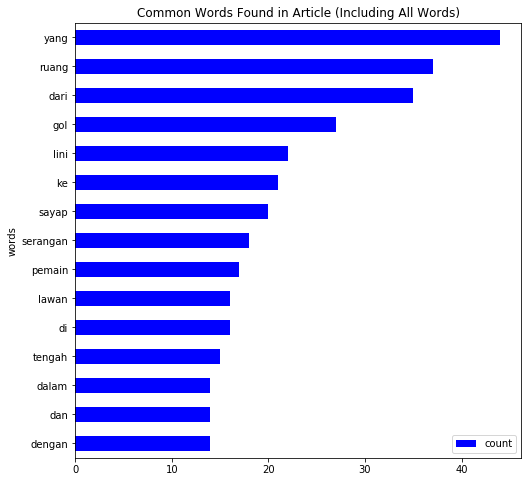

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Common Words Found in Article (Including All Words)")

plt.show()

In [10]:
#word frequency after removing stopwords
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
stop_words = set(stopwords.words('indonesian'))

# View a few words from the set
list(stop_words)[0:10]

['rasa',
 'ditanyai',
 'begitukah',
 'ibarat',
 'bertanya-tanya',
 'cukupkah',
 'kalaulah',
 'menjelaskan',
 'diketahuinya',
 'bukan']

In [12]:
new_word_list = [word for word in words_in_article if not word in stop_words]  
new_word_list

['ps',
 'sleman',
 'menyudahi',
 'perjalanan',
 'liga',
 'status',
 'juara',
 'perjalanannya',
 'super',
 'elja',
 'berhasil',
 'mencetak',
 'gol',
 'pertandingan',
 'dijalani',
 'pss',
 'gagal',
 'mencetak',
 'gol',
 'tujuh',
 'pertandingan',
 'kali',
 'laga',
 'away',
 'kalteng',
 'putera',
 'kali',
 'bertandang',
 'madura',
 'fc',
 'away',
 'melawan',
 'psim',
 'blitar',
 'united',
 'martapura',
 'dirata',
 'cristian',
 'gonzales',
 'kawan',
 'kawan',
 'mencetak',
 'gol',
 'pertandingan',
 'catatan',
 'apik',
 'seto',
 'nurdiyantoro',
 'mencoba',
 'menerapkan',
 'permainan',
 'possession',
 'progressive',
 'berusaha',
 'mengalirkan',
 'bola',
 'lini',
 'lini',
 'menciptakan',
 'peluang',
 'mencetak',
 'gol',
 'gambar',
 'gol',
 'gol',
 'pss',
 'situasi',
 'assisted',
 'unassisted',
 'mayoritas',
 'gol',
 'dicetak',
 'super',
 'elja',
 'berasal',
 'situasi',
 'assisted',
 'situasi',
 'si',
 'pencetak',
 'gol',
 'bola',
 'umpan',
 'rekannya',
 'gol',
 'dicetak',
 'gol',
 'situasi',
 '

In [13]:
import collections
import itertools

# Create counter
counts_no_urls = collections.Counter(new_word_list)

counts_no_urls.most_common(15)

[('ruang', 37),
 ('gol', 27),
 ('lini', 22),
 ('sayap', 20),
 ('serangan', 18),
 ('pemain', 17),
 ('lawan', 16),
 ('situasi', 14),
 ('bola', 13),
 ('pss', 11),
 ('dicetak', 9),
 ('super', 6),
 ('elja', 6),
 ('mencetak', 6),
 ('peluang', 6)]

In [14]:
import pandas as pd

df = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

df.head()

,words,count
0,ruang,37
1,gol,27
2,lini,22
3,sayap,20
4,serangan,18


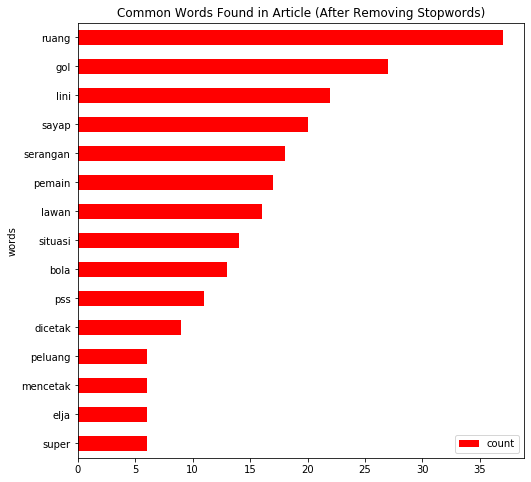

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Common Words Found in Article (After Removing Stopwords)")

plt.show()